In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 8)

In [8]:
for column in df.columns:
    distinct_values = df[column].unique()
    print(f"{column}: {len(distinct_values)} values")
    print(distinct_values)
    print("-" * 50)

Glucose: 136 values
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
--------------------------------------------------
BloodPressure: 47 values
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
--------------------------------------------------
SkinThickness: 51 values
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 

### the correlation matrix

In [9]:
correlation_matrix = df.corr()
correlation_matrix

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


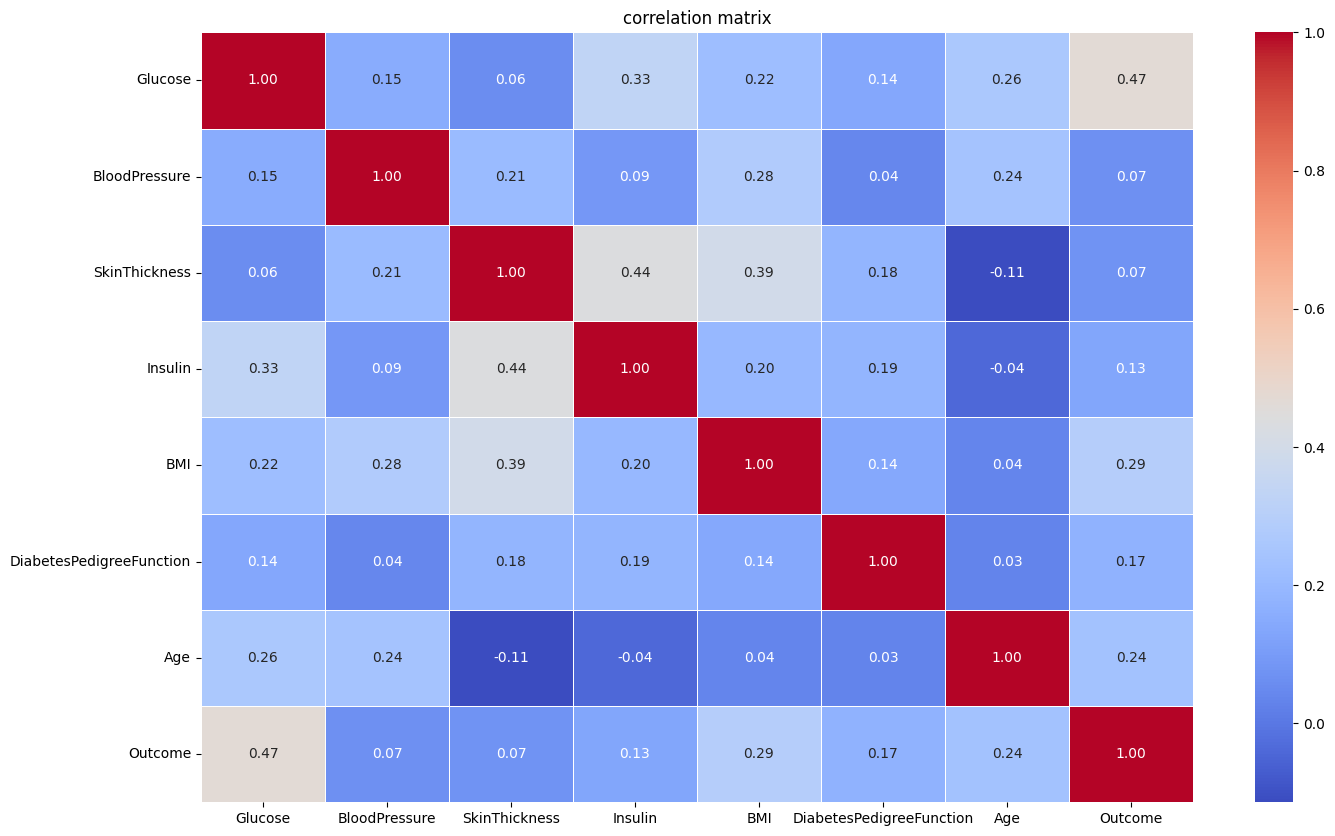

In [10]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("correlation matrix")
plt.show()

### covariance matrix

In [24]:
covariance_matrix = df.cov()
covariance_matrix

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


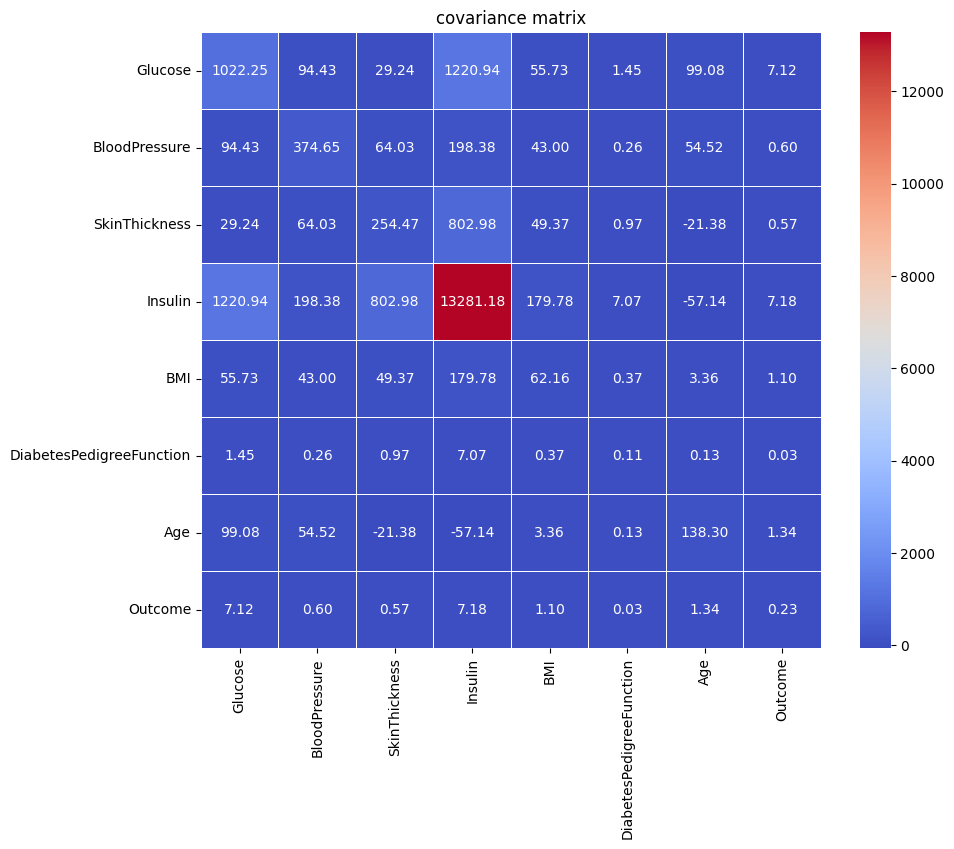

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("covariance matrix")
plt.show()

### eigen values, percentage of inertia, commulative percentage

In [11]:
eigen_values = np.linalg.eigvals(correlation_matrix)
eigen_values_sorted = np.sort(eigen_values)[::-1]
inertia_percentage = (eigen_values_sorted / eigen_values_sorted.sum()) * 100
cumulative_percentage = np.cumsum(inertia_percentage)

result_df = pd.DataFrame({
    'eigen values': eigen_values_sorted,
    'percentage of inertia': inertia_percentage,
    'cumulative percentage': cumulative_percentage
}, index=range(1, len(eigen_values_sorted) + 1))

result_df.index.name = 'component'

result_df.round(2)

,eigen values,percentage of inertia,cumulative percentage
component,,,
1,2.30,28.78,28.78
2,1.43,17.93,46.70
3,1.09,13.66,60.36
4,0.87,10.93,71.29
5,0.83,10.32,81.61
6,0.59,7.42,89.03
7,0.49,6.08,95.11
8,0.39,4.89,100.00


### histogram of eigen values

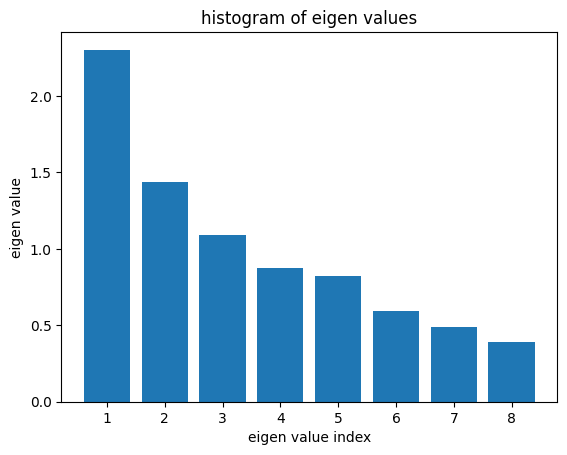

In [12]:
plt.bar(range(1, len(eigen_values_sorted) + 1), eigen_values_sorted)
plt.xlabel('eigen value index')
plt.ylabel('eigen value')
plt.title('histogram of eigen values')
plt.show()

### compute the principal components, contributions, representational qualities of individuals

In [13]:
pca = PCA()
pca.fit(df)

principal_components = pd.DataFrame(pca.components_, columns=df.columns)
contributions = pd.DataFrame(np.abs(principal_components), columns=df.columns)
representational_qualities = np.square(contributions)

In [14]:
print("principal components:")
print(principal_components)

principal components:
    Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.097815       0.016095       0.060756  0.993112  0.014011   
1  0.972553       0.141633      -0.057843 -0.094713  0.046982   
2 -0.142387       0.922829       0.307662 -0.021181  0.132685   
3  0.118136      -0.267279       0.887085 -0.065352  0.192929   
4 -0.087851      -0.225609       0.249774  0.000118  0.018969   
5 -0.050873      -0.075665      -0.221342  0.006133  0.970677   
6 -0.006078       0.002419      -0.001054  0.000107 -0.013973   
7  0.000509       0.000013      -0.002379 -0.000309  0.000380   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.000537 -0.003561  0.000585  
1                  0.000818  0.139670  0.007007  
2                  0.000644  0.124107 -0.000317  
3                  0.002703 -0.293562  0.002711  
4                  0.001687  0.937335  0.005965  
5                  0.002039  0.016270  0.013175  
6                  0.217248 -0.006026  0.9

In [15]:
print("contributions:")
print(contributions)

contributions:
    Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.097815       0.016095       0.060756  0.993112  0.014011   
1  0.972553       0.141633       0.057843  0.094713  0.046982   
2  0.142387       0.922829       0.307662  0.021181  0.132685   
3  0.118136       0.267279       0.887085  0.065352  0.192929   
4  0.087851       0.225609       0.249774  0.000118  0.018969   
5  0.050873       0.075665       0.221342  0.006133  0.970677   
6  0.006078       0.002419       0.001054  0.000107  0.013973   
7  0.000509       0.000013       0.002379  0.000309  0.000380   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.000537  0.003561  0.000585  
1                  0.000818  0.139670  0.007007  
2                  0.000644  0.124107  0.000317  
3                  0.002703  0.293562  0.002711  
4                  0.001687  0.937335  0.005965  
5                  0.002039  0.016270  0.013175  
6                  0.217248  0.006026  0.975975  

In [16]:
print("representational qualities:")
print(representational_qualities)


representational qualities:
        Glucose  BloodPressure  SkinThickness       Insulin           BMI  \
0  9.567729e-03   2.590369e-04       0.003691  9.862723e-01  1.963087e-04   
1  9.458592e-01   2.005985e-02       0.003346  8.970552e-03  2.207333e-03   
2  2.027411e-02   8.516128e-01       0.094656  4.486158e-04  1.760537e-02   
3  1.395605e-02   7.143782e-02       0.786921  4.270824e-03  3.722147e-02   
4  7.717711e-03   5.089948e-02       0.062387  1.384397e-08  3.598251e-04   
5  2.588034e-03   5.725203e-03       0.048992  3.761441e-05  9.422143e-01   
6  3.694366e-05   5.853217e-06       0.000001  1.137727e-08  1.952416e-04   
7  2.588843e-07   1.722455e-10       0.000006  9.543914e-08  1.445423e-07   

   DiabetesPedigreeFunction           Age       Outcome  
0              2.885481e-07  1.268357e-05  3.426749e-07  
1              6.692062e-07  1.950759e-02  4.909116e-05  
2              4.150814e-07  1.540261e-02  1.006460e-07  
3              7.308077e-06  8.617860e-02  7.3

### the individuals in the first factorial

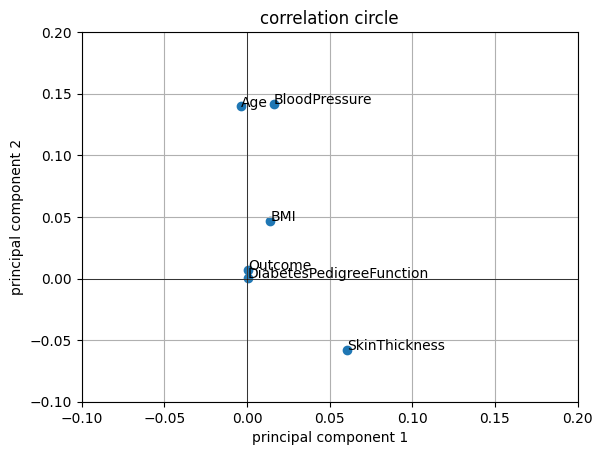

In [17]:
fig, ax = plt.subplots()
ax.scatter(pca.components_[0, :], pca.components_[1, :])
for i, txt in enumerate(df.columns):
    ax.annotate(txt, (pca.components_[0, i], pca.components_[1, i]))
ax.set_xlim(-0.1, 0.2)
ax.set_ylim(-0.1, 0.2)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('correlation circle')
plt.grid()
plt.show()


### compute the principal components, contributions, representational qualities of the variables.

In [18]:
pca_var = PCA()
pca_var.fit(df)
principal_components_var = pd.DataFrame(pca_var.components_, columns=df.columns)
contributions_var = pd.DataFrame(np.abs(principal_components_var), columns=df.columns)
representational_qualities_var = np.square(contributions_var)

In [19]:
print("principal components:")
print(principal_components_var)

principal components:
    Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.097815       0.016095       0.060756  0.993112  0.014011   
1  0.972553       0.141633      -0.057843 -0.094713  0.046982   
2 -0.142387       0.922829       0.307662 -0.021181  0.132685   
3  0.118136      -0.267279       0.887085 -0.065352  0.192929   
4 -0.087851      -0.225609       0.249774  0.000118  0.018969   
5 -0.050873      -0.075665      -0.221342  0.006133  0.970677   
6 -0.006078       0.002419      -0.001054  0.000107 -0.013973   
7  0.000509       0.000013      -0.002379 -0.000309  0.000380   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.000537 -0.003561  0.000585  
1                  0.000818  0.139670  0.007007  
2                  0.000644  0.124107 -0.000317  
3                  0.002703 -0.293562  0.002711  
4                  0.001687  0.937335  0.005965  
5                  0.002039  0.016270  0.013175  
6                  0.217248 -0.006026  0.9

In [20]:
print("contributions:")
print(contributions_var)

contributions:
    Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.097815       0.016095       0.060756  0.993112  0.014011   
1  0.972553       0.141633       0.057843  0.094713  0.046982   
2  0.142387       0.922829       0.307662  0.021181  0.132685   
3  0.118136       0.267279       0.887085  0.065352  0.192929   
4  0.087851       0.225609       0.249774  0.000118  0.018969   
5  0.050873       0.075665       0.221342  0.006133  0.970677   
6  0.006078       0.002419       0.001054  0.000107  0.013973   
7  0.000509       0.000013       0.002379  0.000309  0.000380   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.000537  0.003561  0.000585  
1                  0.000818  0.139670  0.007007  
2                  0.000644  0.124107  0.000317  
3                  0.002703  0.293562  0.002711  
4                  0.001687  0.937335  0.005965  
5                  0.002039  0.016270  0.013175  
6                  0.217248  0.006026  0.975975  

In [21]:
print("representational Qualities:")
print(representational_qualities_var)

representational Qualities:
        Glucose  BloodPressure  SkinThickness       Insulin           BMI  \
0  9.567729e-03   2.590369e-04       0.003691  9.862723e-01  1.963087e-04   
1  9.458592e-01   2.005985e-02       0.003346  8.970552e-03  2.207333e-03   
2  2.027411e-02   8.516128e-01       0.094656  4.486158e-04  1.760537e-02   
3  1.395605e-02   7.143782e-02       0.786921  4.270824e-03  3.722147e-02   
4  7.717711e-03   5.089948e-02       0.062387  1.384397e-08  3.598251e-04   
5  2.588034e-03   5.725203e-03       0.048992  3.761441e-05  9.422143e-01   
6  3.694366e-05   5.853217e-06       0.000001  1.137727e-08  1.952416e-04   
7  2.588843e-07   1.722455e-10       0.000006  9.543914e-08  1.445423e-07   

   DiabetesPedigreeFunction           Age       Outcome  
0              2.885481e-07  1.268357e-05  3.426749e-07  
1              6.692062e-07  1.950759e-02  4.909116e-05  
2              4.150814e-07  1.540261e-02  1.006460e-07  
3              7.308077e-06  8.617860e-02  7.3

### Question 8:
Plot the correlation circle.

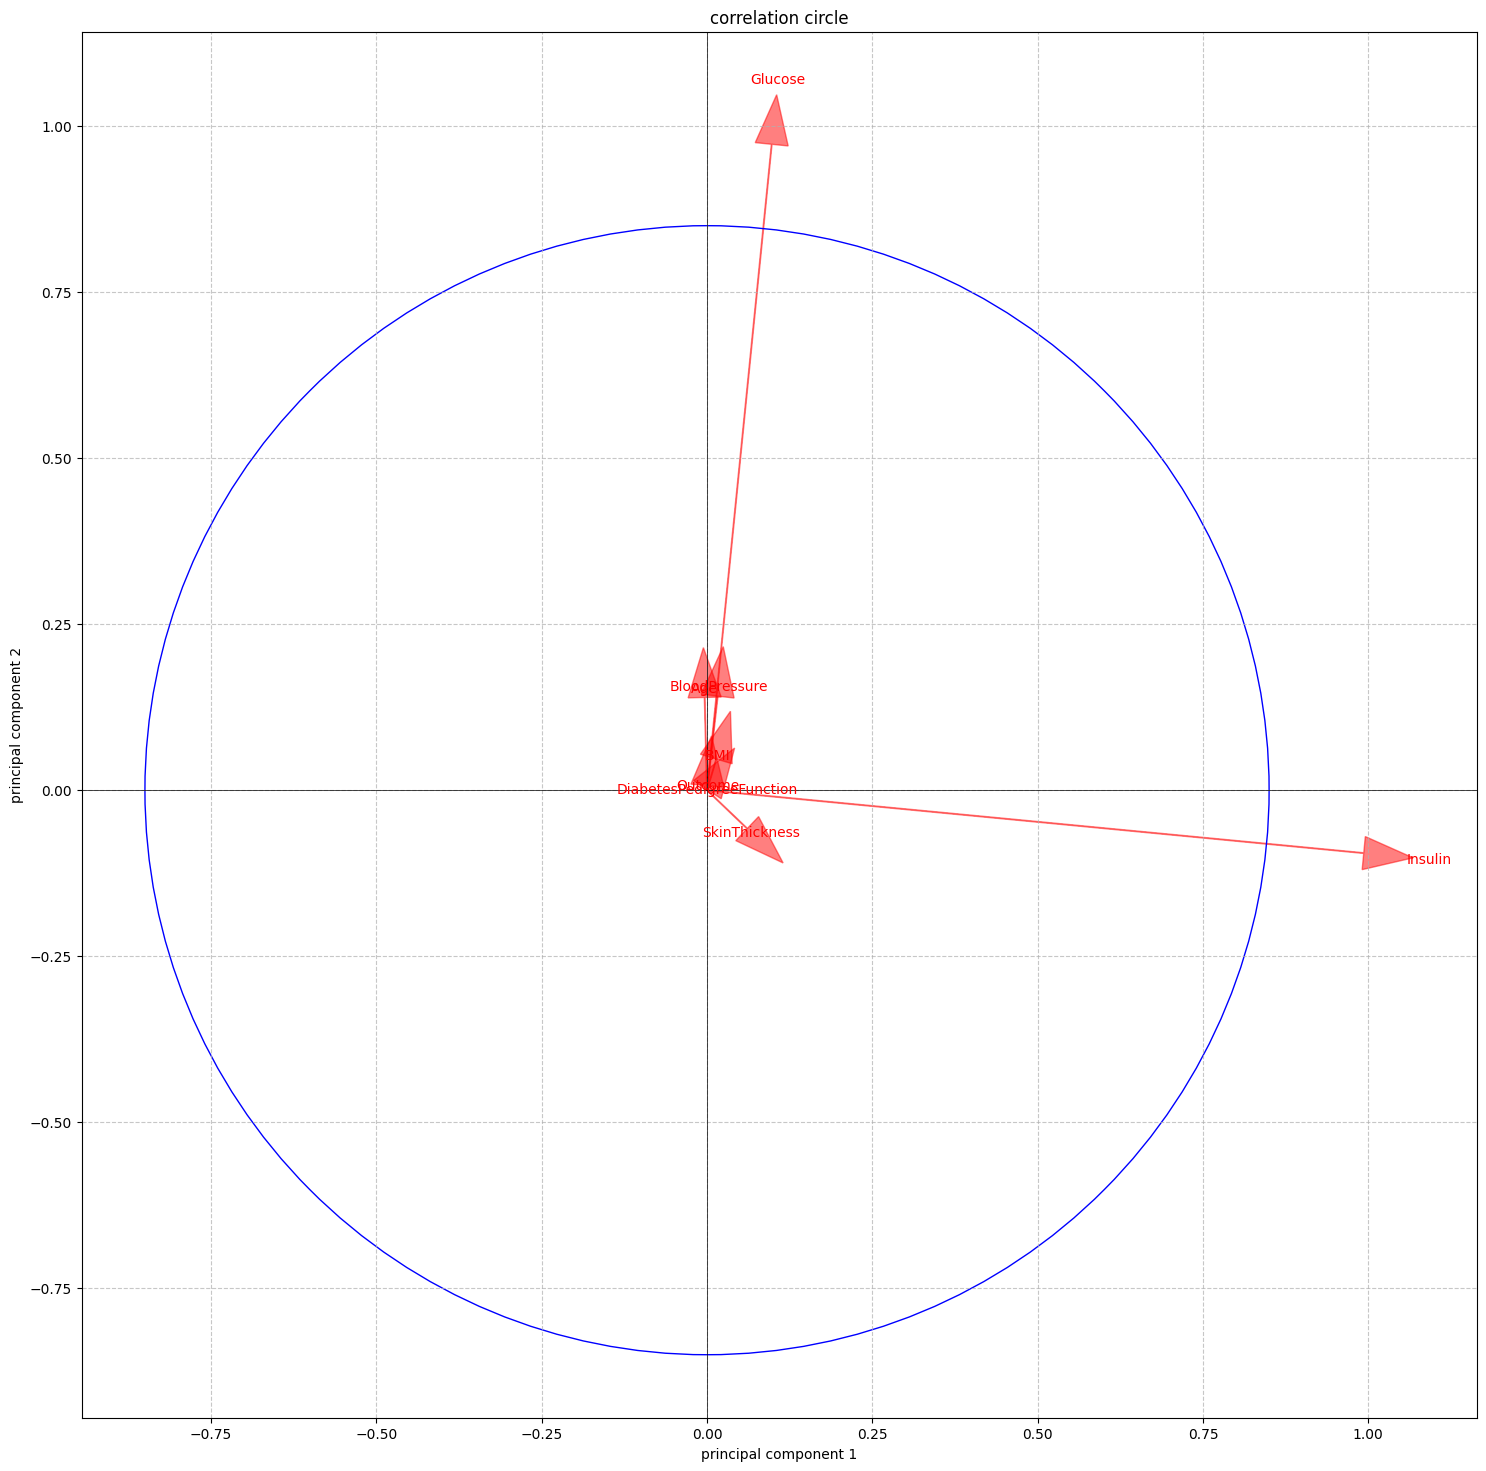

In [22]:
fig, ax = plt.subplots(figsize=(18, 18))
for i, var in enumerate(df.columns):
    ax.arrow(0, 0, principal_components[var][0], principal_components[var][1], 
             color='r', alpha=0.5, head_width=0.05)
    ax.text(principal_components[var][0] * 1.1, principal_components[var][1] * 1.1, var, 
            color='r', ha='center', va='center')

circle = plt.Circle((0, 0), radius=0.85, color='b', fill=False)
ax.add_patch(circle)

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('correlation circle')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()